In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.duplicated('CustomerId').sum()

0

In [6]:
df = df.set_index('CustomerId')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


#**Encoding**

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.replace({'Geography': {'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.replace({'Gender': {'Male':0, 'Female':1}}, inplace=True)

In [12]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [13]:
df.replace({'Num Of Products': { 1:0, 2:1, 3:1, 4:1 }}, inplace=True)

In [14]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [15]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [16]:
df.loc[df['Balance']==0, 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

500 people with zero bank balance have left the bank

In [17]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

Creating New Column Zero Balance

<Axes: >

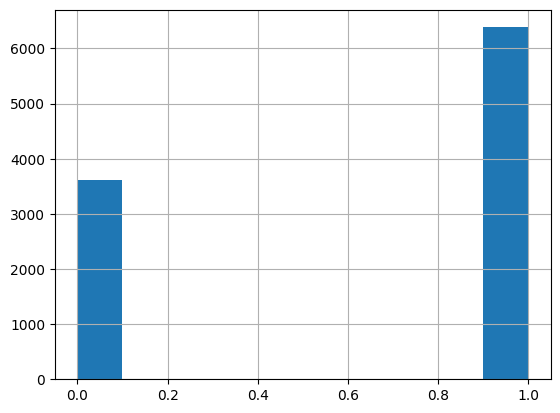

In [18]:
df['Zero Balance'].hist()

In [19]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# **Define Label and Features**

In [20]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [21]:
x = df.drop(['Surname', 'Churn'], axis=1)

In [22]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15634602,619,2,1,42,2,0.00,0,1,1,101348.88,0
15647311,608,0,1,41,1,83807.86,0,0,1,112542.58,1
15619304,502,2,1,42,8,159660.80,1,1,0,113931.57,1
15701354,699,2,1,39,1,0.00,1,0,0,93826.63,0
15737888,850,0,1,43,2,125510.82,0,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,2,0,39,5,0.00,1,1,0,96270.64,0
15569892,516,2,0,35,10,57369.61,0,1,1,101699.77,1
15584532,709,2,1,36,7,0.00,0,0,1,42085.58,0


In [23]:
y = df['Churn']

In [24]:
y

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Churn, Length: 10000, dtype: int64

In [25]:
x.shape, y.shape

((10000, 11), (10000,))

In [26]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

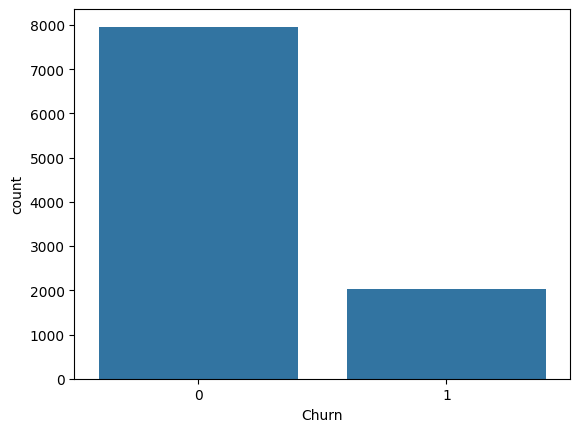

In [27]:
sns.countplot(x='Churn', data=df)

In [28]:
x.shape, y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
rus = RandomUnderSampler(random_state=2529)

In [31]:
x_rus, y_rus = rus.fit_resample(x, y)

In [32]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [33]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [34]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

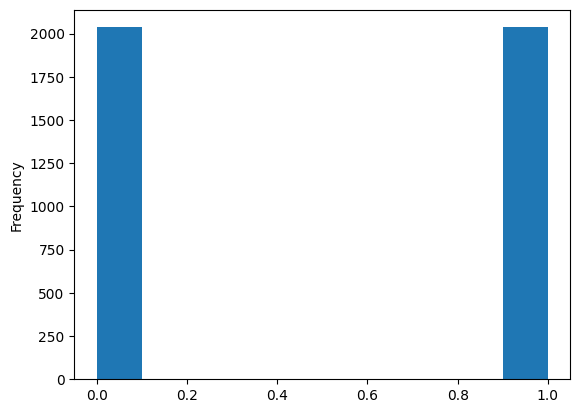

In [35]:
y_rus.plot(kind='hist')

# **Random Over Sampling**

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler(random_state=2529)

In [38]:
x_ros, y_ros = ros.fit_resample(x, y)

In [39]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [40]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [41]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

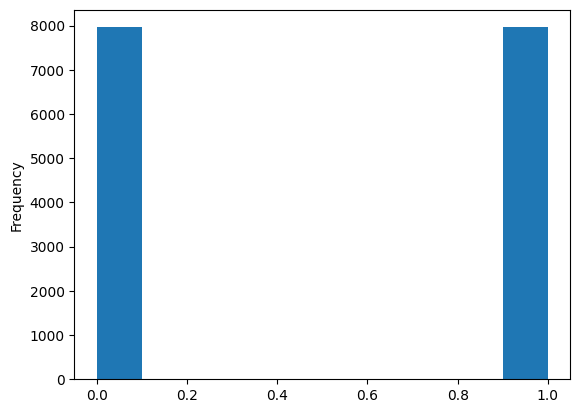

In [42]:
y_ros.plot(kind='hist')

# **Train Test Split**

In [43]:
from sklearn.model_selection import train_test_split

**Split Original Data**

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)

**Split Random Under Sample Data**

In [45]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=2529)

**Split Random Over Sample Data**

In [46]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3, random_state=2529)

# **Standardize Features**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

**Standardize Original Data**

In [49]:
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [50]:
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Standardize Random Under Sample Data**

In [51]:
x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [52]:
x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Standardize Random Under Sample Data**

In [53]:
x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [54]:
x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# **Support Vector Machine Classifier**

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC()

In [57]:
svc.fit(x_train, y_train)

SVC()

In [58]:
y_pred = svc.predict(x_test)

# **Model Accuracy**

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]])

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



# **Hyperparameter Tunning**

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [64]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [65]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [66]:
grid_predictions = grid.predict(x_test)

In [67]:
confusion_matrix(y_test, grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [68]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



# **Model with Random Under Sampling**

In [69]:
svc_rus = SVC()

In [70]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [71]:
y_pred_rus = svc_rus.predict(x_test_rus)

**Model Accuracy**

In [72]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]])

In [73]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



**Hyperparameter Tunning**

In [74]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [75]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_rus.fit(x_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [76]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [77]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [78]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [79]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# **Model with Random Over Sampling**

In [80]:
svc_ros = SVC()

In [81]:
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [82]:
y_pred_ros = svc_ros.predict(x_test_ros)

**Model Accuracy**

In [83]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [84]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



**Haperparameter Tunning**

In [85]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [86]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(x_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [87]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [88]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [89]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [90]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# **Summary**

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [92]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [93]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [94]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [95]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [96]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



# **Feature Distributions by Churn Status:**

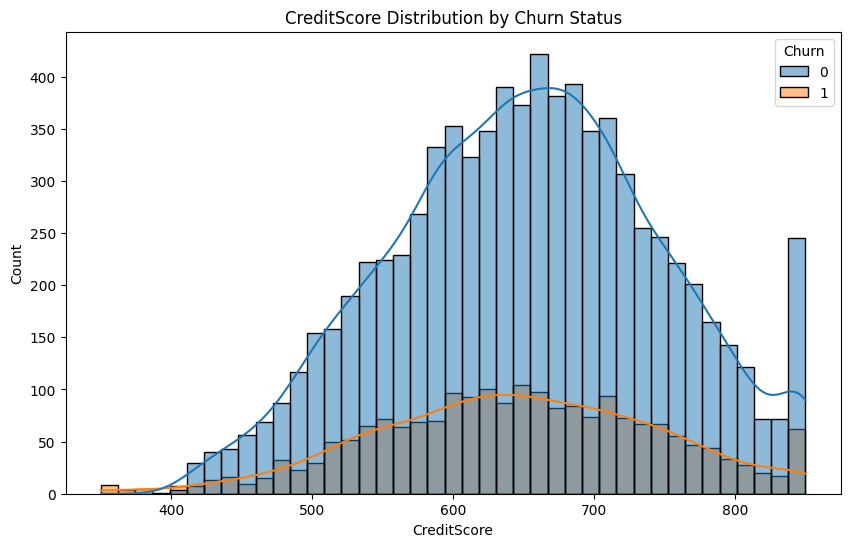

In [97]:
# Example for 'CreditScore'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Churn', kde=True)
plt.title('CreditScore Distribution by Churn Status')
plt.show()

# **Model Comparison**

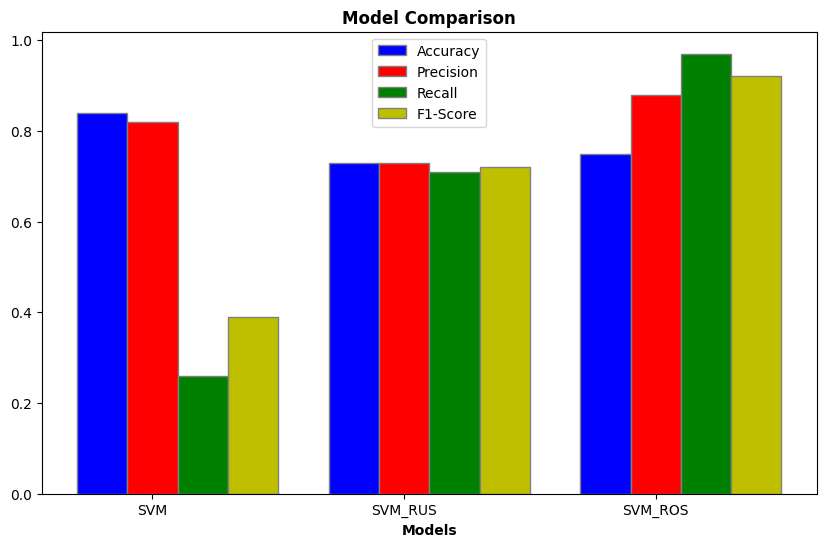

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to compare
models = ['SVM', 'SVM_RUS', 'SVM_ROS']
accuracy = [0.84, 0.73, 0.75]
precision = [0.82, 0.73, 0.88]
recall = [0.26, 0.71, 0.97]
f1_score = [0.39, 0.72, 0.92]

# Set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='r', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(accuracy))], models)
plt.title('Model Comparison', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()

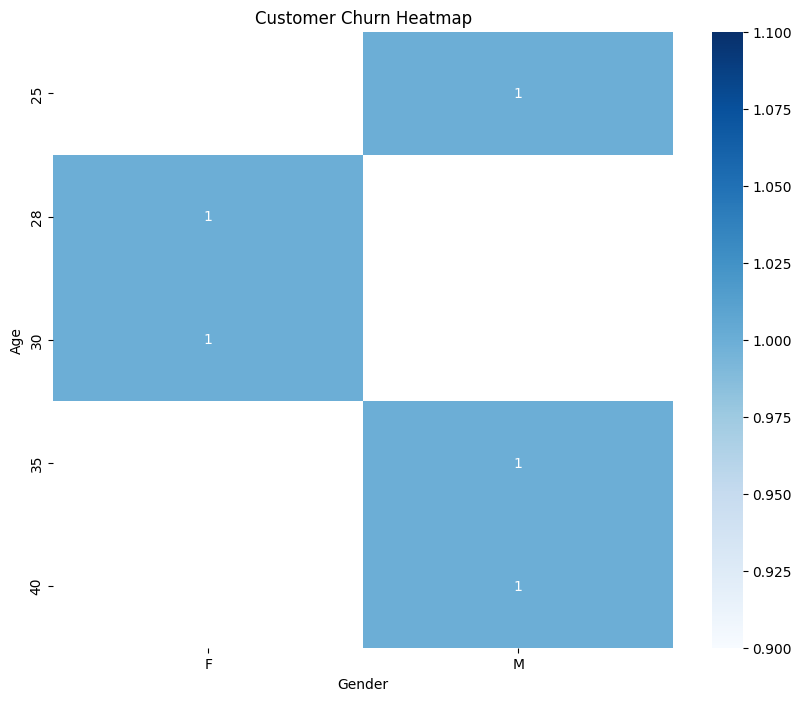

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame containing customer data with churn status and relevant attributes

# Example data preparation (replace with your actual dataset)
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [25, 30, 40, 35, 28],
    'Gender': ['M', 'F', 'M', 'M', 'F'],
    'TenureMonths': [12, 24, 36, 6, 48],
    'MonthlyCharges': [50, 70, 60, 80, 65],
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Define the attributes to be used in the heatmap (replace with your chosen features)
attributes = ['Age', 'Gender', 'TenureMonths', 'MonthlyCharges']

# Create a pivot table to aggregate churn rate by attribute combinations
pivot_table = pd.pivot_table(df, values='Churn', index=attributes, aggfunc='count')

# Reset the index to make attribute columns accessible
pivot_table.reset_index(inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table.pivot(index=attributes[0], columns=attributes[1], values='Churn'), annot=True, cmap='Blues')

# Set heatmap title and labels
plt.title('Customer Churn Heatmap')
plt.xlabel(attributes[1])
plt.ylabel(attributes[0])

# Show the plot
plt.show()
